# Scripts to do QC on the rift detectors

## Load saved pickle of atl06 data

In [1]:
import pickle
import pandas as pd

shelf_name = 'ross'

atl06_file_name = shelf_name + '_atl06.pickle'
with open(atl06_file_name, 'rb') as handle:
    atl06_data = pickle.load(handle)
atl06_data = pd.DataFrame(atl06_data)

rift_obs_output_file_name = shelf_name + '_rift_obs.pickle'
with open(rift_obs_output_file_name, 'rb') as handle:
    rift_obs = pickle.load(handle)

## Debug the rift observation by running the rift detector on a single data file

 
Found 1 rifts.
Time to detect rifts: 0.13325751200045488


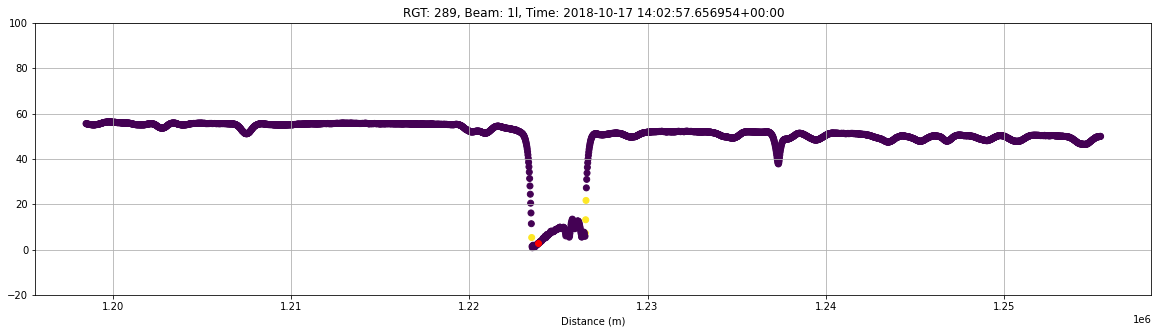

In [118]:
import matplotlib.pyplot as plt
import arc
import importlib
importlib.reload(arc)

indices = np.unique(rift_obs["data_row"])
n=len(indices)
fig,ax=plt.subplots(figsize=(20,5))

# for i in range(1,n):
i = 2
index = indices[i]
d = np.sqrt(atl06_data.iloc[index]["x"]**2 + atl06_data.iloc[index]["y"]**2)
# d = (atl06_data.iloc[index]["x_atc"] - atl06_data.iloc[index]["x_atc"][0])/1e3
# h = atl06_data.iloc[index]["h"]
h = atl06_data.iloc[index]["h"] - atl06_data.iloc[index]["geoid"]

plt.scatter(d,h,c=atl06_data.iloc[index]["quality"])

rift_obs_test = arc.get_rifts(pd.DataFrame([atl06_data.iloc[index]]))
rift_obs_test = pd.DataFrame(rift_obs_test)

for i,s in rift_obs_test.iterrows():
    d_rift = np.sqrt(s["x-centroid"]**2 + s["y-centroid"]**2)
    plt.plot(d_rift,s['h'],'-or')
    
plt.title('RGT: %i, Beam: %s, Time: %s'%(atl06_data.iloc[index]["rgt"],
                               atl06_data.iloc[index]["beam"],
                               atl06_data.iloc[index]["time"]))
plt.xlabel('Distance (m)')

plt.ylim((-20,100))
plt.grid()
# fig.savefig('figures_brunt/plot%i.png'%i)    
# fig.clf()

In [117]:
%matplotlib inline

# Verify that we loaded the data correctly
by making a plot of the ATL06 data

In [ ]:
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
%matplotlib inline
from datetime import datetime

ttstart = datetime.now()
fig = plt.figure(figsize=[12, 12])
# ax  = plt.subplot(projection=ccrs.SouthPolarStereo())
# ax  = plt.subplot(projection=ccrs.NorthPolarStereo(central_longitude=-81.0))
ax  = plt.subplot(projection=ccrs.PlateCarree())

# ax.coastlines(resolution='50m')
# ax.add_feature(cartopy.feature.LAND)

ax.gridlines(draw_labels=True, dms=True ,  x_inline=False, y_inline=False)

thr = 4
sig_thr = 1


from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
lon_formatter = LongitudeFormatter(number_format='.1f',
                                   degree_symbol='',
                                   dateline_direction_label=True)
lat_formatter = LatitudeFormatter(number_format='.1f',
                                  degree_symbol='')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)



for lat, lon, h, q, r in zip(atl06_data['lat'], 
                            atl06_data['lon'], 
                            atl06_data['h'], 
                            atl06_data['quality'],
                            atl06_data['rgt']):
    sc = ax.scatter(lon[q==0],lat[q==0],
                    c=h[q==0],s=1,vmin=15,vmax=30,alpha=0.5,
                    transform=ccrs.PlateCarree())
    if r==95:
        sc = ax.scatter(lon[q==0],lat[q==0],
                    c='r',s=1,vmin=15,vmax=30,alpha=0.5,
                    transform=ccrs.PlateCarree())

# for lat, lon, h, sig in zip(atl06_data['lat'][0:1000], 
#                             atl06_data['lon'][0:1000], 
#                             atl06_data['h'], 
#                             atl06_data['h_sig']):
#     sc = ax.scatter(lon[(h>thr)&(sig<sig_thr)],lat[(h>thr)&(sig<sig_thr)],
#                     c=h[(h>thr)&(sig<sig_thr)],s=1,vmin=0,vmax=30,alpha=0.5,
#                     transform=ccrs.PlateCarree())
plt.colorbar(sc)

# for lat, lon, h, sig in zip(atl06_data['lat'][0:1000], 
#                             atl06_data['lon'][0:1000], 
#                             atl06_data['h'], 
#                             atl06_data['h_sig']):
#     ax.plot(lon[abs(h)<thr],lat[abs(h)<thr],'.r', transform=ccrs.PlateCarree())


plt.show()

ttend = datetime.now()
print('Runtime was: ', ttend - ttstart)

In [ ]:
# import os
# import h5py
# import dateutil.parser as dparser
# from datetime import datetime
# import numpy as np
# from pyproj import Transformer
# import pickle
# import pandas as pd
# from netCDF4 import Dataset

# import matplotlib.pyplot as plt

# # data_directory 
    
# # Load BedMachine ice mask.  This is unfortunately a bit slow...
# # 0 = ocean, 1 = ice-free land, 2 = grounded ice, 3 = floating ice, 4 = lake Vostok
# # maskfile = '/Users/lipovsky/Downloads/BedMachineAntarctica_2019-11-05_v01.nc'
# maskfile = '/Users/bradlipovsky/Downloads/BedMachineAntarctica_2020-07-15_v02.nc'
# fh = Dataset(maskfile, mode='r')
# x = fh.variables['x'][:]
# y = np.flipud(fh.variables['y'][:])
# mask = np.flipud(fh.variables['mask'][:])

# def mask_nearest (x0, y0):
#     xi = np.abs(x-x0).argmin()
#     yi = np.abs(y-y0).argmin()
#     return mask[yi,xi]

# transformer = Transformer.from_crs("EPSG:4326", "EPSG:3031")

# ttstart = datetime.now()

# file_list = os.listdir(data_directory)
# files = [f for f in file_list if f.endswith('.h5')]

# print("Found %i files in the provided directory"%len(files))

# atl06_data = {"lat":list(),"lon":list(),"h":list(),"azimuth":list(),
#               "h_sig":list(),"rgt":list(),"time":list(), #"acquisition_number":list(),
#               "x":list(), "y":list(), "beam":list(), "quality":np.array(), "x_atc":list(), "geoid":list() }

# nf = len(files)
# for f in files:
#     FILE_NAME = os.path.join(data_directory,f)
#     fid = h5py.File(FILE_NAME, mode='r')

#     for lr in ("l","r"):
#         for i in range(1,4):
#             try:
#                 h_xatc = fid['gt%i%s/land_ice_segments/ground_track/x_atc'%(i,lr)][:]
#                 h_li = fid['gt%i%s/land_ice_segments/h_li'%(i,lr)][:]
#                 h_lat = fid['gt%i%s/land_ice_segments/latitude'%(i,lr)][:]
#                 h_lon = fid['gt%i%s/land_ice_segments/longitude'%(i,lr)][:]
#                 h_li_sigma = fid['gt%i%s/land_ice_segments/h_li_sigma'%(i,lr)][:]
#                 seg_az = fid['gt%i%s/land_ice_segments/ground_track/seg_azimuth'%(i,lr)][:]
#                 rgt = fid['/orbit_info/rgt'][0]
#                 quality = fid['gt%i%s/land_ice_segments/atl06_quality_summary'%(i,lr)][:]
#                 time = dparser.parse( fid['/ancillary_data/data_start_utc'][0] ,fuzzy=True )
#                 beam = "%i%s"%(i,lr)
#                 geoid = fid['/gt%i%s/land_ice_segments/dem/geoid_h'%(i,lr)][:]
#                 [h_x,h_y] = transformer.transform( h_lat , h_lon )

#             except KeyError:
#     #                 print("wtf key error")
#                 continue

# #             This is just used for Brunt:
# #                         Not clear why some of the data is out of the region of interest
# #                 if any(h_lon>0):
# #                     continue

#             # Only add the point if is in the ice shelf mask
#             this_mask = [float(mask_nearest(XX,YY)) for XX,YY in zip(h_x,h_y)]

#             h_lat[ this_mask == 3 ]

#             atl06_data["lat"].append( np.array([h_lat[i] for i in range(len(h_li)) if this_mask[i] > 2] ) )